# Analiza najboljših knjig na Goodreads

## Namen projekta

Cilj tega projekta je, da s pomočjo programskega jezika Python pridobim podatke s spletne strani [Goodreads](https://www.goodreads.com/list/show/1.Best_Books_Ever), jih obdelam in analiziram. Gre za spletno stran najbolje ocenjenih knjig, kot so jih izvolili člani Goodreads skupnosti, torej knjig ne ocenjujeo kritiki ampak bralci. Najdemo podatke o naslovu knjig, avtorju, povprečni oceni med 0 in 5, ter številu ocen.

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [251]:
df = pd.read_csv("../podatki/knjige.csv")
df.head()

,naslov,avtor,ocena
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.35 avg rating — 9,717,517 ratings"
1,Pride and Prejudice,Jane Austen,"4.29 avg rating — 4,703,968 ratings"
2,To Kill a Mockingbird,Harper Lee,"4.26 avg rating — 6,764,408 ratings"
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"4.50 avg rating — 3,733,285 ratings"
4,The Book Thief,Markus Zusak,"4.39 avg rating — 2,832,122 ratings"


Sedaj spodaj ločimo oceno na povprečno oceno in število ocen

In [252]:
df["povprečna ocena"] = df["ocena"].str.extract(r"(\d\.\d+)").astype(float)
df["število ocen"] = (
    df["ocena"].str.extract(r"—\s*([\d,]+)").replace(",", "", regex=True).astype(int))
df.drop(columns=["ocena"], inplace=True)
df.index = range(1, len(df) + 1)
df.head()


,naslov,avtor,povprečna ocena,število ocen
1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9717517
2,Pride and Prejudice,Jane Austen,4.29,4703968
3,To Kill a Mockingbird,Harper Lee,4.26,6764408
4,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3733285
5,The Book Thief,Markus Zusak,4.39,2832122


## Analiza podatkov

Spodaj so prikazane analize ocen knjig:
- porazdelitev ocen,
- 10 najbolje ocenjenih knjig,
- 10 najbolj ocenjenih knjig,
- 10 najbolj ocenjenih pisateljev,
- avtorji z največ knjigami na top 100,
- 10 najbolje ocenjenih pisateljev,
- graf, ki ponazarja vse povprečne ocene.

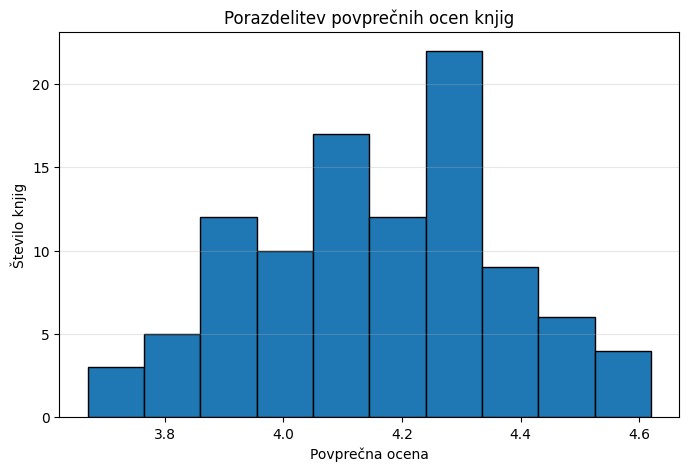

In [253]:
plt.figure(figsize=(8, 5))
plt.hist(df["povprečna ocena"], bins=10, edgecolor="black")

plt.xlabel("Povprečna ocena")
plt.ylabel("Število knjig")
plt.title("Porazdelitev povprečnih ocen knjig")
plt.grid(axis="y", alpha=0.3)
plt.show()


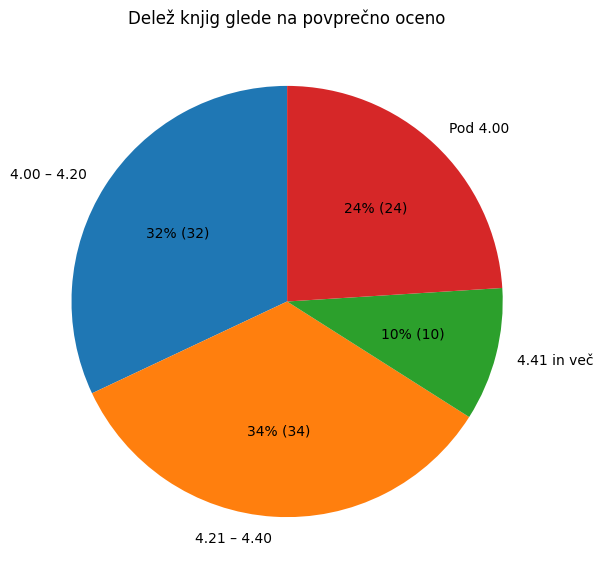

In [254]:
razredi = []
for ocena in df["povprečna ocena"]:
    if ocena < 4.00:
        razredi.append("Pod 4.00")
    elif 4.00 <= ocena <= 4.20:
        razredi.append("4.00 – 4.20")
    elif 4.21 <= ocena <= 4.40:
        razredi.append("4.21 – 4.40")
    else:
        razredi.append("4.41 in več")

df["Razred ocene"] = razredi
stevilo = df.groupby("Razred ocene")["naslov"].count().sort_index()
plt.figure(figsize=(7, 7))
stevilo.plot.pie(
    title="Delež knjig glede na povprečno oceno",
    ylabel="",
    autopct=lambda p: f"{int(round(p))}% ({int(round(p * stevilo.sum() / 100))})",
    startangle=90
)

plt.show()

V zgornjih dvah grafih vidimo porazdelitev ocen knjig na lestvici. Imajo zelo visoke ocene — večina med **4.0 in 4.4**, kar nam dobro prikaže tortni diagram. Povprečna ocena vseh analiziranih knjig je približno **4.2**, vidimo pa lahko, da se najbolje ocenjene knjige gibajo kar okoli **4.5** in da to število celo presežejo, vendar jih ni prav veliko. 

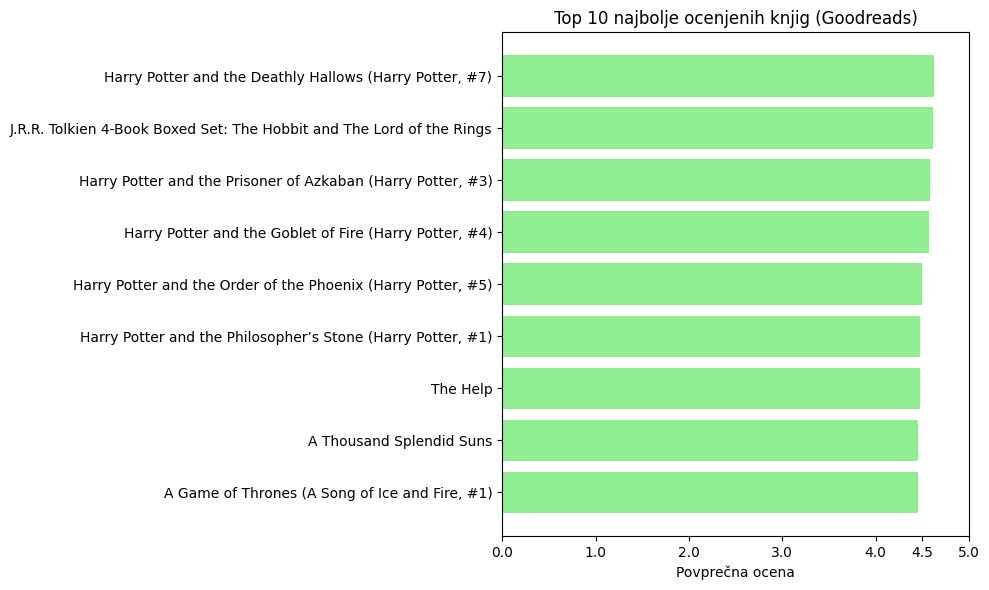

In [255]:
top10 = df.sort_values("povprečna ocena", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["naslov"], top10["povprečna ocena"], color="lightgreen")
plt.gca().invert_yaxis()

ticks_main = np.arange(0, 5, 1)
ticks_extra = np.array([4.5, 5])
x_ticks = np.unique(np.concatenate((ticks_main, ticks_extra)))
plt.xticks(x_ticks)

plt.xlabel("Povprečna ocena")
plt.title("Top 10 najbolje ocenjenih knjig (Goodreads)")
plt.tight_layout()
plt.show()


V top 10 najbolje ocenjenih knjig prvič vidimo trend *Harry Potter* knjig na vrhu, ki izmed 10 mest zavzamejo kar polovico. Opazimo lahko tudi da le peščica knjig preseže **4.5**, iz tortnega diagrama prej pa lahko vidimo, da so to pravzaprav vse knjige z oceno **4.41 ali več**.

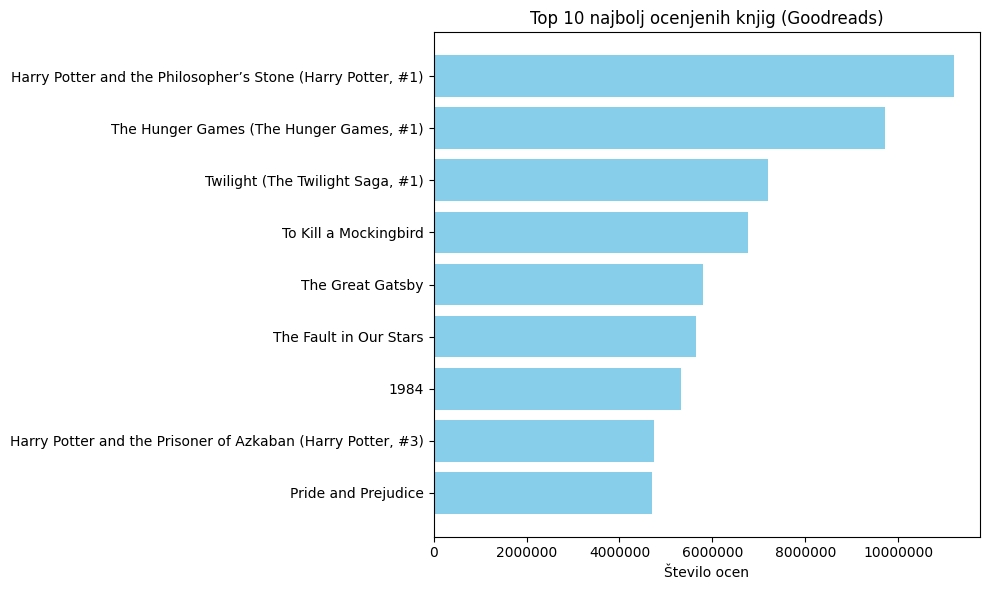

In [256]:
df["število ocen"] = pd.to_numeric(df["število ocen"], errors="coerce")

top10 = df.sort_values("število ocen", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["naslov"], top10["število ocen"], color="skyblue")
plt.gca().invert_yaxis()

plt.xlabel("Število ocen")
plt.title("Top 10 najbolj ocenjenih knjig (Goodreads)")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()



Najbolj priljubljene knjige, kot so *Harry Potter and the Sorcerer's Stone*, *1984* in *To Kill a Mockingbird*, imajo več milijonov ocen, kar kaže na njihovo veliko bralno skupnost, ta pa je še posebej vidna pri knjižni zbirki knjig *Harry Potter*, ki je edina zbirka, ki se pojavi dvakrat.

In [257]:
avtorji = (
    df.groupby("avtor", as_index=False)
    .agg(
        Stevilo_knjig=("naslov", "count"),
        Skupno_stevilo_ocen=("število ocen", "sum"),
        Povprecna_ocena=("povprečna ocena", "mean")
    )
)
avtorji["Povprecna_ocena"] = avtorji["Povprecna_ocena"].round(2)
top10_avtorjev = avtorji.sort_values("Skupno_stevilo_ocen", ascending=False).head(10)
top10_avtorjev.index = range(1, len(top10_avtorjev) + 1)
top10_avtorjev

,avtor,Stevilo_knjig,Skupno_stevilo_ocen,Povprecna_ocena
1,J.K. Rowling,6,31576105,4.54
2,Harper Lee,2,13528816,4.26
3,George Orwell,2,9755281,4.11
4,Suzanne Collins,1,9717517,4.35
5,Stephenie Meyer,1,7197591,3.67
6,F. Scott Fitzgerald,1,5803249,3.93
7,John Green,1,5636088,4.12
8,Khaled Hosseini,2,5144258,4.40
9,Jane Austen,1,4703968,4.29
10,Veronica Roth,1,4324117,4.13


V tabeli, ki kaže avtorje z največ ocenami ponovno na vrhu *Harry Potter*, saj je *J.K. Rowling* z naskokom najbolj ocenjena avtorica. Vidimo tudi, da avtorji z največ ocenami niso nujno napisali najbolje ocenjenih knjig, saj imata *Stephenie Mayer* in *F. Scott Fitzgerald* kljub velikemu številu ocen podpovprečno povprečno oceno.

In [258]:
avtorji = avtorji[avtorji["Stevilo_knjig"] >= 2]
top10_po_knjigah = (
    avtorji.sort_values(
        by=["Stevilo_knjig", "Skupno_stevilo_ocen"],
        ascending=[False, False]
    )
    .head(10)
)
top10_po_knjigah.index = range(1, len(top10_po_knjigah) + 1)
top10_po_knjigah

,avtor,Stevilo_knjig,Skupno_stevilo_ocen,Povprecna_ocena
1,J.K. Rowling,6,31576105,4.54
2,Harper Lee,2,13528816,4.26
3,George Orwell,2,9755281,4.11
4,Khaled Hosseini,2,5144258,4.40
5,J.R.R. Tolkien,2,3233419,4.51
6,Charles Dickens,2,1867204,3.84
7,Fyodor Dostoevsky,2,1424290,4.34


Zgoraj spet lahko vidimo, da razen *J.K. Rowling* nihče nima več kot dveh knjig na top 100, ona pa jih ima kar 6. Opazimo tudi, da se v primerjavi z zgornjo tabelo nekatera imeno ponovijo, ne pa vsa, tako da število knjig na top 100 ne pomeni nujno največ ocen.

In [259]:
avtorji = (
    df.groupby("avtor", as_index=False)
    .agg(
        Stevilo_knjig=("naslov", "count"),
        Povprecna_ocena=("povprečna ocena", "mean")
    )
)
avtorji["Povprecna_ocena"] = avtorji["Povprecna_ocena"].round(2)
top10_best_rated = avtorji.sort_values("Povprecna_ocena", ascending=False).head(10)
top10_best_rated.index = range(1, len(top10_best_rated) + 1)
top10_best_rated

,avtor,Stevilo_knjig,Povprecna_ocena
1,J.K. Rowling,6,4.54
2,J.R.R. Tolkien,2,4.51
3,Kathryn Stockett,1,4.47
4,George R.R. Martin,1,4.45
5,Khaled Hosseini,2,4.40
6,Edgar Allan Poe,1,4.40
7,Markus Zusak,1,4.39
8,Shel Silverstein,1,4.38
9,Ken Follett,1,4.35
10,Stephen King,1,4.35


Zgoraj vidimo povprečno oceno najbooljših desetih avtorjev in koliko knjig na top 100 imajo, kjer se trend *J.K. Rowling* na vrhu nadaljuje

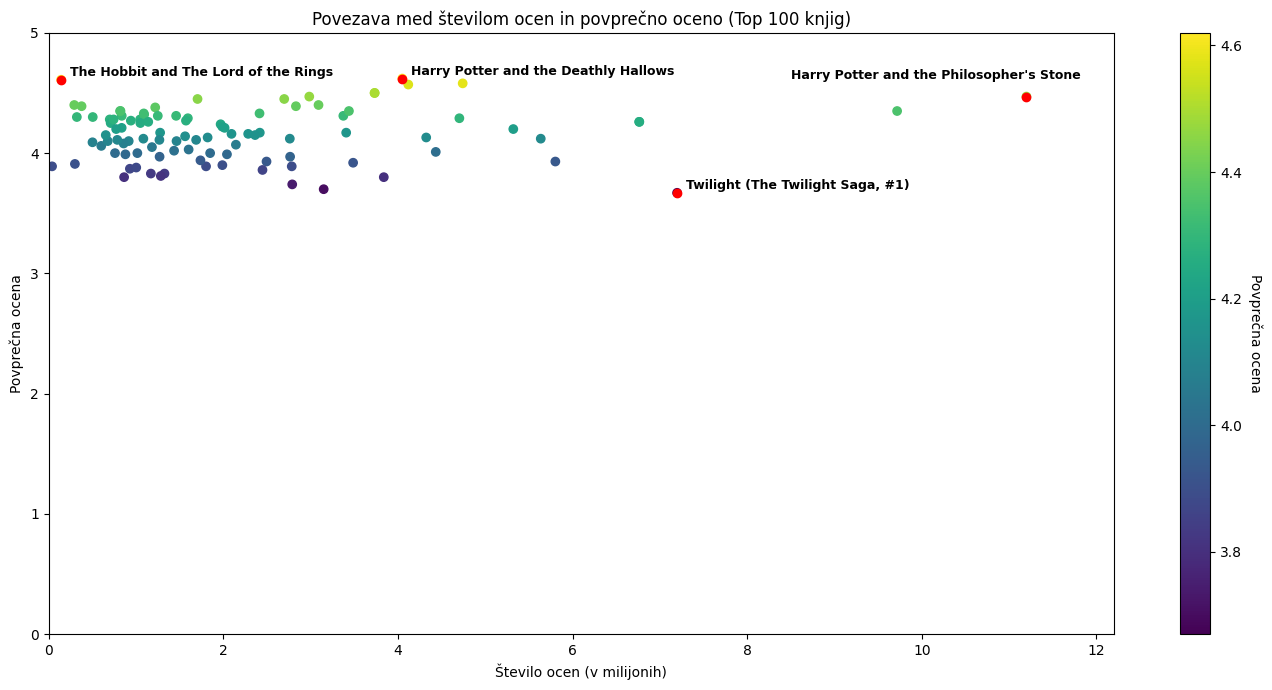

In [260]:
df["Število ocen (v milijonih)"] = df["število ocen"] / 1_000_000
fig, ax = plt.subplots(figsize=(14, 7))
scatter = ax.scatter(
    df["Število ocen (v milijonih)"],
    df["povprečna ocena"],
    c=df["povprečna ocena"],
)
ax.set_xlim(0, df["Število ocen (v milijonih)"].max() + 1)
ax.set_ylim(0, 5)
ax.set_xlabel("Število ocen (v milijonih)")
ax.set_ylabel("Povprečna ocena")
ax.set_title("Povezava med številom ocen in povprečno oceno (Top 100 knjig)")

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Povprečna ocena", rotation=270, labelpad=15)

oznacene_knjige = [
    "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)",
    "Harry Potter and the Deathly Hallows (Harry Potter, #7)",
    "Twilight (The Twilight Saga, #1)",
    "J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings"
]

df["čist_naslov"] = df["naslov"].replace({
    "Harry Potter and the Philosopher’s Stone (Harry Potter, #1)": "Harry Potter and the Philosopher's Stone",
    "Harry Potter and the Deathly Hallows (Harry Potter, #7)": "Harry Potter and the Deathly Hallows",
    "J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings": "The Hobbit and The Lord of the Rings"
})

oznacene = df[df["naslov"].isin(oznacene_knjige)]

for i, row in oznacene.iterrows():
    ax.scatter(
        row["Število ocen (v milijonih)"],
        row["povprečna ocena"],
        color="red",
    )

    if "Stone" in row["naslov"]:
        ax.text(
            row["Število ocen (v milijonih)"] - 2.70,
            row["povprečna ocena"] + 0.15,
            row["čist_naslov"],
            fontsize=9,
            fontweight="bold",
        )
    else:
        ax.text(
            row["Število ocen (v milijonih)"] + 0.10,
            row["povprečna ocena"] + 0.03,
            row["čist_naslov"],
            fontsize=9,
            fontweight="bold",
        )
plt.tight_layout()
plt.show()


Graf prikazuje razmerje med število ocen in povprečno oceno. Opazimo, da kljub temu da je *Twilight* druga najbolj ocenjena knjiga, ime še vedno zelo slabo oceno. Na drugi strani pa ima četverica *The Hobbit and The Lord of the Rings* skoraj najmanj ocen na celem seznamu, a je kljub temu navdušila svoje bralce.  

## Zaključek

Analiza knjig nam je pokazala, da če veliko ljudi bere isto knjigo, to še ne pomeni da je odlična. Videli smo, da je že ena sama knjiga na top 100 vrhunski doseg, ter da je le peščici uspelo napisati več uspešnih knjig, ki bi se uvrstile na Goodreads lestvico. Seveda je po pričakovanju zbirka knjig *Harry Potter* na vrhu skoraj vsake individualne metrike, tako da tudi visoke ocene *J.K. Rowling* ne presenečajo. Žal nismo mogli primerjati zbirk *Harry Potter* in *The Lord of the Rings*, saj so na Goodreads kot četverica, skupaj s *Hobbitom*. Kljub temu lahko vidimo, da so bralci obeh zbirk nad knjigami navdušeni, vendar je navdušencev *Harry Potterja* precej več, vsaj na Goodreads.